# Objectives

* Explain how sampling is related to its related population
* Describe the difference between discrete and continuous random variables
* Describe the difference between PMFs, PDFs, and CDFs

In [1]:
# Initial imports 
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# First Steps: Sampling

Before we get into our main topic of probability distributions, it'll help to first understand the concept of **sampling**.

## Our View of The World Isn't Perfect

We don't have _perfect_ information; life doesn't have an answer key.

Ideally, we want to have all the details of a whole group. But as you can guess, that's not always feasible.

**🧠  What are some reasons we sometimes _can't_ observe the whole group?**
<details>
<ul>
    <li>Expensive</li>
    <li>Unrealistic</li>
    <li>We don't need it to gain insights!</li>
</ul>
</details>

## Solutions?

Let's use an example scenario to think about how we can approach this. Let's say we would like to know the ages of students at Flatiron School. 

Picture what this might look like. How would you describe the population of students' ages?

> **Key Terms**
>
> We define the **population** as the whole group we're interested in. We abstract this to the population being the whole set of _possible outcomes_.
> 
> And when we "pick" a student (or students), we say we have (randomly) _sampled_ over the population. We call this subset of "picked" individuals/outcomes from the population a **sample**.

Well, if we knew what the **population** (all the Flatiron students) looked like, we could probably get an idea of what the likely age is of a _randomly_ picked one from the population.

We can describe the "look" of the population a **probability distribution**. 

> **Key Terms**
> 
> A **probability distribution** is a representation of the frequencies of potential outcomes or the percentage of time each outcome occurs.

There are a few ways to get the probability distribution, even if it's only approximate.

### Observe the Whole Population

This might seem like "cheating" but sometimes this is really the best way even if it's "expensive" (monetarily, time, or otherwise). Sometimes this has already been done for us and we can use those results. It's important to note that sometimes the information is outdated but we can use it as approximately right. (Think how the US Census is done only every 10 years.)

So in our example, we could have a _distribution_ of ages of our population. Let's say of all students were asked their age when enrolling:

- $15\%$ are under the age of $25$
- $30\%$ are between $25$ & $30$
- $25\%$ are between $30$ & $35$
- $20\%$ are between $35$ & $40$
- $10\%$ are over the age of $40$

### We Sample and Infer the Population's Distribution 

Another method is to sample the population (usually randomly) and observe what the sample's distribution looks like. We can then infer what the population might look like.

Suppose we ask 100 random students their ages and observe the following:

- $10$ are under the age of $25$
- $30$ are between $25$ & $30$
- $30$ are between $30$ & $35$
- $15$ are between $35$ & $40$
- $15$ are over the age of $40$

Then we can guess that our population is similar to this distribution.

How similar? Well, that can be a tough question and is part of _inferential statistics_ where we make predictions based on our observations/data.  We'll  be going into more detail about this in the near future.

## Sampling & Point Estimates 

> The sample statistic is calculated from the sample data and the population parameter is inferred (or estimated) from this sample statistic. Let me say that again: Statistics are calculated, parameters are estimated. - James Jones

**Know the differences - Population v Sample Terminology**

Characteristics of populations are called *parameters*<br/>
Characteristics of a sample are called *statistics*

<img src="https://media.cheggcdn.com/media/7ac/7ac1a812-3b41-4873-8413-b6a7b8fab530/CL-26481V_image_006.png" width=700>

Let's work through an example to understand this topic better. We grabbed wage and classification information for 11,739 City of Seattle Employees (as of March 2022).

Details: https://data.seattle.gov/City-Business/City-of-Seattle-Wage-Data/2khk-5ukd

In [2]:
# Grab our data
df = pd.read_csv('data/City_of_Seattle_Wage_Data_031422.csv')
df.head()

,Department,Last Name,First Name,Job Title,Hourly Rate
0,Seattle Public Utilities,Batchelor,Craig,"Civil Engrng Spec,Sr",53.740
1,Finance & Admin Services,Altice,Jeffrey,Auto Mechanic,39.780
2,Finance & Admin Services,Montes,Valeria,Cust Svc Rep,29.450
3,Fire Department,Kuklok,Rebecca,Cust Svc Rep *,29.450
4,Planning & Comm Development,Quirindongo,Rico,Executive3,97.164


In [3]:
# Thing to note - the column name 'Hourly Rate ' has a space at the end
df.columns

Index(['Department', 'Last Name', 'First Name', 'Job Title', 'Hourly Rate '], dtype='object')

In [4]:
# So let's rename the columns
[c.replace(" ", "") for c in df.columns]

['Department', 'LastName', 'FirstName', 'JobTitle', 'HourlyRate']

In [5]:
df = df.rename(columns = lambda x: x.replace(" ", ""))

In [6]:
# Check our work
df.columns

Index(['Department', 'LastName', 'FirstName', 'JobTitle', 'HourlyRate'], dtype='object')

What we'll do is grab a random sample, of 500 employees, and see how the sample statistics match up with our population parameters.

In [7]:
# gonna use the random library to add randomness
import random

# seed for reproducibility (not too random)
random.seed(2021) 

In [8]:
# set our parameters
sample_size = 500
total_employees = len(df)

In [9]:
# Sample 500 random employees
sample = df.sample(n=sample_size)

In [10]:
sample

,Department,LastName,FirstName,JobTitle,HourlyRate
5803,Parks & Recreation,Whitfield,Michelle,Capital Prjts Coord *,51.25
11278,Seattle Public Utilities,Green,Nathaniel,Wtr Treatment CC,44.88
6771,Seattle City Light,Provido,Maria Theresa,Warehouser-BU,30.97
6185,Parks & Recreation,Yahne,Craig,Tennis Instructor *,25.46
8383,Police Department,Souriall,Jordan,Pol Ofcr-Patrl-BWV,55.34
...,...,...,...,...,...
6574,Seattle Public Utilities,Hong,Logan,"Meter Reader,Sr",36.36
233,Fire Department,Baumgarten,Seth,Fireftr-Ap Drvr C-90.46,51.70
1439,Fire Department,Bruce,Kyra,Fireftr-90.46 Hrs,34.81
8229,Seattle City Light,Nsiiro,Julius,"Elecl Engr,Assoc",52.41


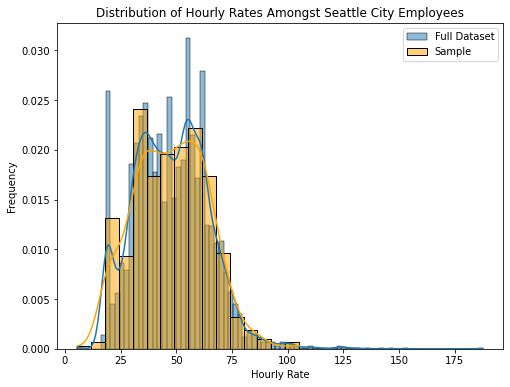

In [11]:
#Make a visualization that shows the distribution of hourly rate

plt.figure(figsize=(8,6))

sns.histplot(df['HourlyRate'], label='Full Dataset', stat='density', kde=True)
sns.histplot(sample['HourlyRate'], label='Sample', stat='density', kde=True, color='orange', alpha=.5)

plt.xlabel("Hourly Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Hourly Rates Amongst Seattle City Employees")
plt.legend()
plt.show()

Another comparison: 

In [12]:
print("Full Dataset:")
print(df.describe())
print("*" * 20)
print("Sample:")
print(sample.describe())

Full Dataset:
         HourlyRate
count  11739.000000
mean      47.817331
std       16.722128
min        5.530000
25%       35.400000
50%       47.340000
75%       59.550000
max      187.767000
********************
Sample:
       HourlyRate
count  500.000000
mean    47.599603
std     16.340088
min      5.530000
25%     35.207500
50%     47.660000
75%     60.587500
max    105.112000


So, how'd our sample do?

- 


## Going Forward

For the rest of the lecture, we're going to focus on how we can describe probability distributions. This will give us a tool set whether we're talking about a sample or an established population.

> **Aside - Use a Mathematical Model as a Proxy to the Population's Distribution**
> 
> If we know what a population distribution _should_ look, we can mathematically  define a model that would fill-in for our population.
> 
> This is analogous to something like using a perfect circle to approximate a car's tire. Is it exactly the same? No, there are some deviations from the circle but it's close enough for many applications.
> 
> There are many other _parametric probability distributions_ which can be described mathematically and can be very convenient for us. We won't focus on this now, but know that is another use case of probability distributions.

# Probability Distributions

We will learn about a variety of different probability distributions, but before we do so, we need to establish the difference between **discrete** and **continuous** distributions.

A fundamental distinction among kinds of distributions is the distinction between discrete and continuous distributions. 

A **discrete distribution** (or variable) takes on countable values, like integers, where every outcome has a positive probability.

A **continuous distribution** takes on a continuum of values, like real numbers. It assigns probabilities to ranges of values (not any one single value)

![](https://miro.medium.com/max/1022/1*7DwXV_h_t7_-TkLAImKBaQ.png)

[More Explanation](https://mathbitsnotebook.com/Algebra1/FunctionGraphs/FNGContinuousDiscrete.html)

## Discrete Distributions

With discrete distributions, you can only get certain specific values, not all values in a range.  Take, for example, a roll of a single six-sided die - there are 6 possible outcomes of the roll, and non-integer numbers between 1 and 6 are not possible results.

### Examples of Discrete Distributions

- **Uniform Distribution**
    - Occurs when all possible outcomes are equally likely.
    - e.g. rolling a six-sided die
    
- **Bernoulli Distribution**
    - Represents the probability of success for a certain experiment (binary outcome).
    - e.g. flipping a fair coin
    
- **Binomial Distribution**
    - Represents the probability of observing a specific number of successes (Bernoulli trials) in a specific number of trials.
    - e.g. number of defects found from a 100-random sample from the production line

## Continuous Distributions

With a continuous distribution, you can expect to get any value within a range. Think about measuring the length of something. The reported measurement can always be more or less precise.

### Examples of Continuous Distributions

- **Continuous Uniform**
    - A continuous distribution that takes values within a specified range *a* to *b*, when each value within the range is equally likely.
    - e.g. time take an elevator arrive at your floor.

- **Normal (Gaussian)**
    - A probability distribution that is symmetric about the mean, showing that the mean are more frequent in occurrence than data far from the mean.
    - e.g. individual height in a population
    
- **Exponential**
    - Uses to model the time elapsed between events.
    - e.g. amount of time a postal clerk spends with a customer

## Probability Distribution Functions

### Probability Mass Functions (PMF) / Probability Density Functions (PDF) & Cumulative Density Functions (CDF)

(I know, "Probability Distribution Functions" and "Probability Density Functions" have the same acronym. PDF normally stands for the latter - the former is a more catch-all term for all three of these)

![example graphs of a continuous cdf with corresponding pdf and discrete cdf with corresponding pmf](images/cdf.png)


### Probability Mass Function

The **probability mass function (PMF)** for a *discrete random variable* gives, at any value $k$, the probability that the random variable takes the value $k$. 

### Probability Density Function

**Probability density functions (PDF)** are similar to PMFs, in that they describe the probability of a result within a range of values. But where PMFs are appropriate for discrete variables and so can be descibed with barplots, PDFs are smooth curves that describe *continuous random variables*.  

We can think of a PDF as a bunch of bars of probabilities getting smaller and smaller until each neighbor is indistinguishable from its neighbor.

It is then intuitive that you cannot calculate expected value and variance in the same way as we did with PMFs.  Instead, we have to integrate over the entirety of the curve to calculate the expected value.

![](images/pdf_inter.png)

## Distributions with Scipy Stats

Documentation: https://docs.scipy.org/doc/scipy/reference/stats.html

## First Up: Get to know the `stats` module with Discrete Distributions!

### Bernoulli Distribution 

The **Bernoulli** distribution shows the outcome of a single trial where there are only 2 possible options.

The easiest example is a single coin flip of a fair coin.

In [14]:
# Define our likelihood of 'success'
p_success = .5

# Now - lets use the stats library to get the probabilities 
# Probability of 'failure' (0)
p_tails = stats.bernoulli.pmf(k=0, p=p_success)
# Probability of 'success' (1)
p_heads = stats.bernoulli.pmf(k=1, p=p_success)

In [17]:
# Create a dict for visualization:
coin_flip = {
    
    "Tails" : p_tails,
    'Heads' : p_heads
}

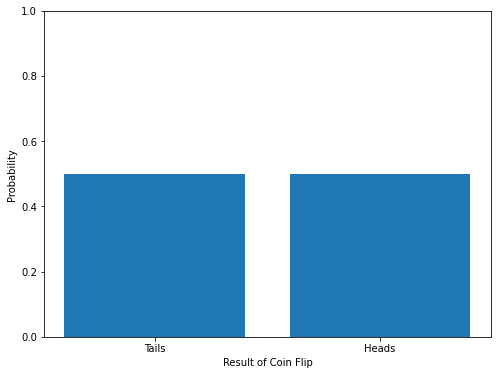

In [18]:
# visualize it
plt.figure(figsize=(8,6))

plt.bar(coin_flip.keys(), height=coin_flip.values())

plt.ylabel('Probability')
plt.xlabel('Result of Coin Flip')
plt.ylim(0, 1)
plt.show()

In [20]:
# Now let's check out the cumulative probability
# 'failure'
print(stats.bernoulli.cdf(k=0, p=p_success))
# 'success'
print(stats.bernoulli.cdf(k=1, p=p_success))

0.5
1.0


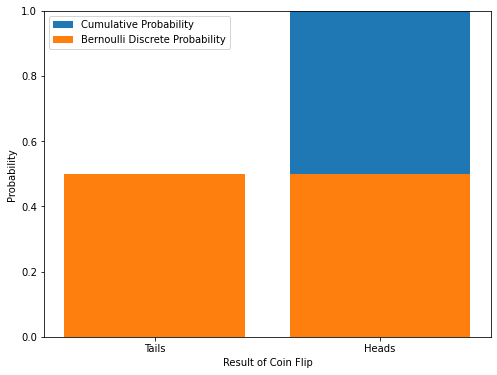

In [21]:
# visualize it
plt.figure(figsize=(8,6))
plt.bar(coin_flip.keys(),
        height=[stats.bernoulli.cdf(k=0, p=p_success), 
                stats.bernoulli.cdf(k=1, p=p_success)],
        label='Cumulative Probability')
plt.bar(coin_flip.keys(), 
        height=coin_flip.values(),
        label='Bernoulli Discrete Probability')
plt.ylabel('Probability')
plt.xlabel('Result of Coin Flip')
plt.ylim(0, 1)
plt.legend()
plt.show()

A note - Bernoulli distributions do not need to showcase a fair and balanced trial, as was the case above. Let's look really quickly at a game where the chance of winning is only 10%:

In [24]:
p_success = .1

# Let's 'freeze' this distribution
rv = stats.bernoulli(p=p_success)

# Create a dict for visualization:
unfair_game = {

    "Lose" : rv.pmf(k=0),
    "Win" : rv.pmf(k=1)

}

In [26]:
unfair_game

{'Lose': 0.9, 'Win': 0.10000000000000002}

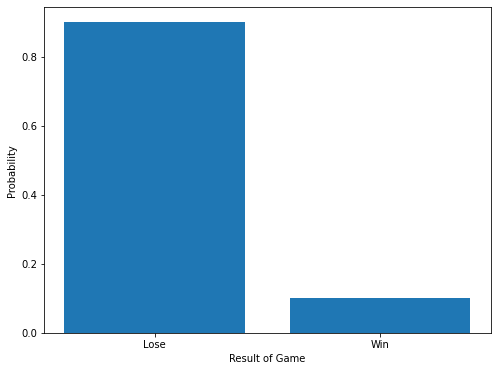

In [25]:
# visualize it
plt.figure(figsize=(8,6))

plt.bar(unfair_game.keys(), height=unfair_game.values())

plt.ylabel('Probability')
plt.xlabel('Result of Game')
plt.show()

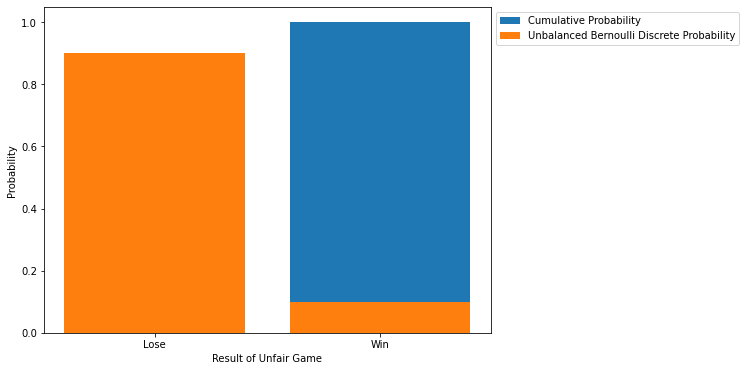

In [27]:
# visualize it
plt.figure(figsize=(8,6))

plt.bar(unfair_game.keys(), 
        height=[rv.cdf(0), rv.cdf(1)], 
        label='Cumulative Probability')

plt.bar(unfair_game.keys(), 
        height=unfair_game.values(),
        label='Unbalanced Bernoulli Discrete Probability')

plt.ylabel('Probability')
plt.xlabel('Result of Unfair Game')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Another note - a **Bernoulli** distribution is not the same as a **Binomial** distribution.

- Bernoulli shows the probable results of a single trial with only 2 outcomes
- Binomial shows the probable summed results of MANY trials with only 2 outcomes

### Uniform

The **Uniform** distribution applies when all possible values of the variable are _equally probable_. 

If I'm rolling a fair die, then the six possible outcomes are all equally probable. That is, the chance that I roll a 1 is 1 in 6, as is the chance that I roll a 2 etc.

In [30]:
low = 1
high = 6

# Scipy stats' randint is a discrete uniform distribution
possible_rolls = {}

for roll in range(low, high+1):
    possible_rolls[roll] = (stats.randint.pmf(k=roll, low=low, high=high+1))

possible_rolls

{1: 0.16666666666666666,
 2: 0.16666666666666666,
 3: 0.16666666666666666,
 4: 0.16666666666666666,
 5: 0.16666666666666666,
 6: 0.16666666666666666}

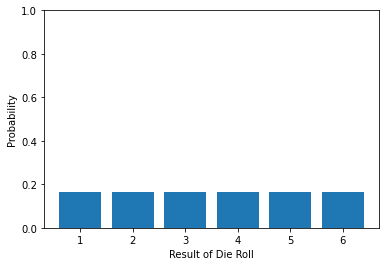

In [31]:
# visualize it
plt.bar(possible_rolls.keys(), height=possible_rolls.values())

plt.ylabel('Probability')
plt.xlabel('Result of Die Roll')
plt.ylim(0, 1)
plt.show()

In [34]:
# 'freeze' the distribution
rv = stats.randint(low, high+1)
# using dictionary comprehension (!!) to get the CDF
cdf_roll = {roll: rv.cdf(roll) for roll in range(low, high+1)}
cdf_roll

{1: 0.16666666666666666,
 2: 0.3333333333333333,
 3: 0.5,
 4: 0.6666666666666666,
 5: 0.8333333333333334,
 6: 1.0}

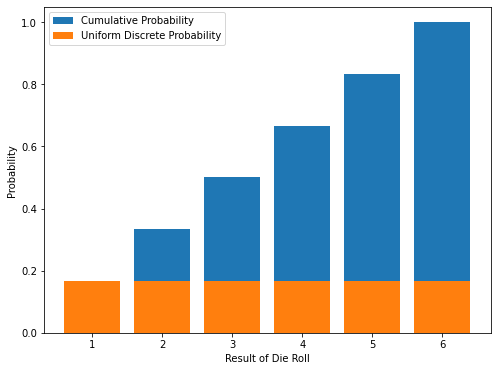

In [33]:
# visualize it
plt.figure(figsize=(8,6))
plt.bar(cdf_roll.keys(), height=cdf_roll.values(), 
        label='Cumulative Probability')

plt.bar(possible_rolls.keys(), height=possible_rolls.values(), 
        label='Uniform Discrete Probability')

plt.ylabel('Probability')
plt.xlabel('Result of Die Roll')
plt.legend()
plt.show()

## Next Up: Continuous Distributions!

### Normal Distribution

Suppose I want to simulate the behavior of a certain frog that has an average weight of 15 oz. with a standard deviation of 2.5 oz.:

In [35]:
# Create required parameters for the distribution 
# mean of the data
mu = 15
# standard deviation of the data
sigma = 2.5
# number of observations to be created
size = 1000

# Create a discrete distribution with the given parameter values
# Use rvs to create random values within this distribution
normal = stats.norm.rvs(loc=mu, scale=sigma, size=size)

print(f'Continuous Random Variable: \n {normal} \n')

Continuous Random Variable: 
 [13.64722564  8.70813015 12.26904768 16.57276869 15.97031369 14.42432843
 18.69615065 18.4065952   9.58580795 14.14397255 18.9636758  10.76040906
 12.26920233 16.81461896 12.18420972 17.04320219 16.34706337 14.11981478
 15.29594578 14.59049957 11.36642905 12.98011582 14.36963215 12.40832343
 14.01248563 14.20927451 11.8069741  14.86265022 15.05307863 15.35848718
 15.33846538 16.24168689 15.99047098 18.54954428 10.90351427 12.03592396
 14.90513142 15.34463103 17.02525058 13.47546963 14.75005661 14.77539029
 19.24837893 15.67188481 13.00103301 15.46417873 14.18063336  9.12344635
 15.14264066  9.03276422 13.99364281 12.85642891 16.997512   19.51794184
 13.25172366 15.35026791 13.76220651 14.82710751 16.19018731 13.5308756
 19.05106864 16.43903439 13.03056582 16.63267265 17.08184335 15.87092628
 14.02517975 15.56175621 14.92072659 11.74312717 17.36165566 13.89382493
 17.49185864 13.75541618 19.08193577 14.55747635 12.75616863 14.11037218
 19.94002866 11.804356

The **mean** of our probability density function (PDF) affects where it is centered on the x-axis. This is the `loc` parameter in the `stats` module.

The two plots below have the same shape, but different centers.

Text(0.5, 1.0, 'Two distributions differing in mean')

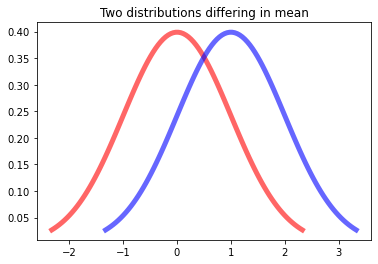

In [36]:
# Plotting the probability density function for continuous data
fig, ax = plt.subplots()

# Distribution with zero mean
mean = 0

# Calculate the percentile for x axis using stats.norm.ppf()
z_curve = np.linspace(stats.norm(mean, 1).ppf(0.01),
                      stats.norm(mean, 1).ppf(0.99), 
                      100)

# Calculate the density values using stats.norm.pdf() for every percentile position
# Plot the distribution in red
ax.plot(z_curve, 
        stats.norm(mean, 1).pdf(z_curve),
        'r-', lw=5, alpha=0.6, label='z_curve')

# Distribution with mean value = 1
mean = 1

# Calculate the percentile for x axis using stats.norm.ppf()
z_curve = np.linspace(stats.norm(mean, 1).ppf(0.01),
                      stats.norm(mean, 1).ppf(0.99), 
                      100)

# Calculate the density values using stats.norm.pdf() for every percentile position
# Plot the distribution in blue
ax.plot(z_curve, 
        stats.norm(mean, 1).pdf(z_curve),
        'b-', lw=5, alpha=0.6, label='norm pdf')

ax.set_title("Two distributions differing in mean")

The **variance** of our plots describes how closely the points are gathered around the mean. Low variance means tight and skinny, high variance short and wide. This is the `scale` parameter in the `stats` module.

The two plots below have the same mean, but different variance:

Text(0.5, 1.0, 'Two distributions differing in variance')

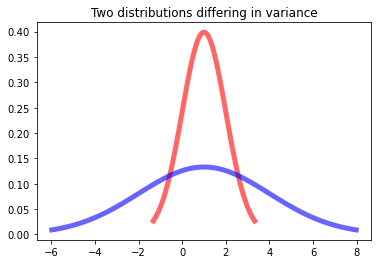

In [47]:
# Create 2 normal distributions with same mean, but different sigma/scale
fig, ax = plt.subplots()

mean = 1
var = 1
z_curve = np.linspace(stats.norm(mean, var).ppf(0.01),
                      stats.norm(mean, var).ppf(0.99), 
                      100)

ax.plot(z_curve, stats.norm(mean, var).pdf(z_curve),
        'r-', lw=5, alpha=0.6, label='z_curve')

mean = 1
var = 3
z_curve = np.linspace(stats.norm(mean, var).ppf(0.01),
                      stats.norm(mean, var).ppf(0.99), 
                      100)

ax.plot(z_curve, stats.norm(mean, var).pdf(z_curve),
        'b-', lw=5, alpha=0.6, label='norm pdf')

ax.set_title("Two distributions differing in variance")

## Some Things to Be Aware Of

- For continuous random variables, obtaining probabilities for observing a specific outcome is not possible 
- Be careful with interpretation of PDF

We can use the CDF to learn the probability that a variable will be less than or equal to a given value.

Typically, you'll see something like this equation associated with the CDF:

$$F(x) = P(X\leq x)$$

###  Code with Python:

Let's use the ```scipy.stats``` module to calculate the cumulative density for both discrete and continuous distributions.

For discrete distributions, let's try to calculate the probability of the **binomial** distribution for the number of successes equal or less than 8 successes out of 20 trials.

$$P(x \leq 8)$$

In [53]:
p = .5 

In [55]:
# Create the random discrete value for the number of success
k = 8
n_trials = 20
# Calculate the probability for x equal or less than 8
stats.binom.cdf(k=k, n=n_trials, p=p)

0.25172233581542974

For continuous distributions, we can calculate the probability of the **normal** distribution for a random value of x equal or less than 18.

$$P(x \leq 18)$$

In [56]:
# Use the above defined parameters!
# mean of the data
mu=15
# Standard deiviation of the data
sigma = 2.5

In [60]:
# Create the random x value for calculation
x = 18

# Calculate the probability for x equal or less than 18
stats.norm.cdf(x=x, loc=mu, scale=sigma)

0.8849303297782918

Note: the ```cdf``` function by default return the probability of the left hand tail of the distribution. If you are interested to calculate the right hand tail probability, you can simply subtract the probability of the left tail from 1.

$$P(x>18) = 1 - P(x \leq 18)$$


## Example: Using CDF & comparison to PDF

Consider the following normal distributions of heights.

The PDF and the CDF look like:


Text(0.5, 1.0, 'CDF of Height in the US')

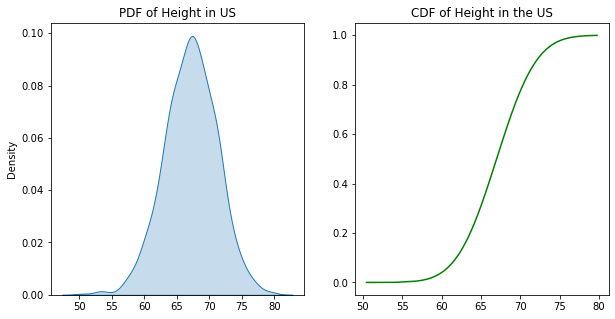

In [48]:
# Create a fake dataset with mean = 67, sigma = 4, and N = 1000
r = sorted(stats.norm.rvs(loc=67, scale=4, size=1000))

# Calculate the CDF using stats.norm.cdf()
r_cdf = stats.norm.cdf(r, loc=67, scale=4)

# Plot the PDF and CDF side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(r, ax=ax1, shade=True)
ax1.set_title('PDF of Height in US')

ax2.plot(r, r_cdf, color='g')
ax2.set_title('CDF of Height in the US')

If we provide `numpy` with the underlying parameters of our distribution, we can calculate:

In [49]:
# the probability that a value falls below a specified value
r = stats.norm(67, 4)
print(f'The probability density at 73 is {r.cdf(73)}')

The probability density at 73 is 0.9331927987311419


In [50]:
# the probability that a value falls between two specified values
r = stats.norm(67, 4)
print(f'Probability between the range 67 to 75 is {r.cdf(75) - r.cdf(67)}')

Probability between the range 67 to 75 is 0.4772498680518208


We can also calculate the value associated with a specfic percentile:

In [51]:
# the 95th percentile
print(f'The 95th percentile: {r.ppf(0.95)}')

The 95th percentile: 73.5794145078059


# Exercises

## Order Totals CDF & PDF

Imagine that an online clothing business gets orders with totals that are normally distributed with an average of \\$95 and a standard deviation of \\$18. **Graph the PDF and CDF** for the orders for this business. 

In [ ]:
# Your code here


<details>
    <summary>Answer</summary>
        <code>
        r = sorted(stats.norm.rvs(loc=95, scale=18, size=1000))
        r_cdf = stats.norm.cdf(r, loc=95, scale=18)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        sns.kdeplot(r, ax=ax1, shade=True)
        ax1.set_title('PDF of Revenue') 
        ax2.plot(r, r_cdf, color='g')
        ax2.set_title('CDF of Revenue')
        </code>
</details>

## Order Totals Observations

After graphing, **write 1-3 observations** about the distributions of order totals based on these graphs.

**Your Observations**

Observation 1: 

Observation 2: 

Observation 3:


## How to Describe Distributions: Center, Spread and Shape

The **center** refers loosely to the middle-values of a distribution, and is measured more precisely by notions like the mean, the median, and the mode.

The **spread** refers loosely to how far away the more extreme values are from the center, and is measured by some value showing variation - more precisely by the standard deviation, which is effectively a measure of the average distance away from the mean.

![different spread representations](images/examplesOfSpread.jpg)

The **shape** refers loosely how the data shows up when visualized, more specifically capturing details like symmetry or skew, as well as the number of peaks in the distribution.

![different distribution shapes](images/shapesOfDistributions.jpg)

Note that sometimes the center of your distribution is harder to capture precisely, if the shape is skewed:

![examples of skewed distributions](images/order_of_mean_median_mode.png)

[Image Source for the images in this cell](http://mathcenter.oxford.emory.edu/site/math117/shapeCenterAndSpread/)

# Level Up: Details on Expected Value and Variance

## For PMF - Discrete Values

### Expected Value/Mean

The expected value, or the mean, describes the 'center' of the distribution (you may hear this called the first moment).  The 'center' refers loosely to the middle-values of a distribution, and is measured more precisely by notions like the mean, the median, and the mode.

For a discrete distribution, working from the vantage point of a collected sample of n data points:

mean = $\Large\mu = \frac{\Sigma^n_{i = 1}x_i}{n}$

If we are working from the vantage point of known probabilities, the mean is referred to as the expected value. The expected value of a discrete distribution is the weighted sum of all values of x, where the weight is their probability.
 
The expected value of the Lotto example is:
${\displaystyle \operatorname {E} [X]= \Sigma^n_{i=1}p(x_i)x_i}$

### Variance/Standard Deviation

Variance describes the spread of the data (it is also referred to as the second moment).  The 'spread' refers loosely to how far away the more extreme values are from the center.

Standard deviation is the square root of variance, and effectively measures the *average distance away from the mean*.

From the standpoint of a sample, the variance of a discrete distribution of n data points is:

std = $\Large\sigma = \sqrt{\frac{\Sigma^n_{i = 1}(x_i - \mu)^2}{n}}$


Variance is the expectation of the squared deviation of a random variable from its mean.


# Level Up: CDF Use Cases

You might look at the CDF and wonder if it's a shadow of my beloved histogram. But there are some good use cases for this way of visualizing the CDF

In [ ]:
# First let's define some data
domain_x = np.linspace(-1,1,100)
norm_dist = stats.norm.rvs(0,0.3,domain_x.shape)
norm_dist.shape

## Quickly identify key values

Finding features like the median, minimum, maximum, and quartiles are easy to read

In [ ]:
f,(ax_pdf,ax_cdf) = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

###### Histogram (PDF)
ax_pdf = sns.histplot(x=norm_dist, ax=ax_pdf, alpha=0.4)
# You can also see the PDF if you want
# ax_pdf = sns.kdeplot(x=out, cumulative=False, ax=ax_pdf)

# Median line
ax_pdf.vlines(
    x=np.median(norm_dist),
    ymin=0,
    ymax=20,
    linestyles='--',
    color='red'      
)
# 25th-percentile line
ax_pdf.vlines(
    x=np.quantile(norm_dist, 0.25),
    ymin=0,
    ymax=20,
    linestyles='--',
    color='purple'      
)
# 75th-percentile line
ax_pdf.vlines(
    x=np.quantile(norm_dist, 0.75),
    ymin=0,
    ymax=20,
    linestyles='--',
    color='purple'      
)

###### CDF 
ax_cdf = sns.kdeplot(x=norm_dist, cumulative=True, ax=ax_cdf)

# Median line
ax_cdf.hlines(
    y=0.5,
    xmin=-1,
    xmax=1,
    linestyles='--',
    color='red'
)
# 25th-percentile line
ax_cdf.hlines(
    y=0.25,
    xmin=-1,
    xmax=1,
    linestyles='--',
    color='purple'
)
# 75th-percentile line
ax_cdf.hlines(
    y=0.75,
    xmin=-1,
    xmax=1,
    linestyles='--',
    color='purple'
)

## Outliers can be more obvious

Visualizations with outliers can be a little tricky. Take a look at your histogram. With outliers, it might be identified but can distort our focus.

In [ ]:
# Add an outlier
norm_with_outliers = np.append(norm_dist, 5*np.abs(np.random.randn(5)))
print(f'The range of norm_dist: \n{norm_dist.min(), norm_dist.max()}\n')
print(f'The range of norm_with_outliers: \n{norm_with_outliers.min(), norm_with_outliers.max()}\n')

In [ ]:
f,(ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

# Showing the outliers
sns.histplot(x=norm_with_outliers, alpha=0.4, ax=ax0)

# Ignoring outliers
ax1=sns.histplot(x=norm_with_outliers, alpha=0.4, ax=ax1)
ax1.set_xlim(right=1.)

In a worst-case, you might not notice the outliers because it gets swallowed up due by a bin because of the number of bins or bin width parameter

Now using a CDF, it can be a lot easier to identify when there is an extreme value even if we scale the $x$-axis.

In [ ]:
f,(ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

# Showing the outliers
ax0 = sns.kdeplot(x=norm_with_outliers, cumulative=True, ax=ax0)
ax0.hlines(1,xmin=-1,xmax=3,color='red',linestyles='--')

# Ignoring outliers
ax1 = sns.kdeplot(x=norm_with_outliers, cumulative=True, ax=ax1)
ax1.hlines(1,xmin=-1,xmax=1,color='red',linestyles='--')
ax1.set_xlim(right=1.)

## Identifying clusters

Typically not hard with a histogram. But you can also see it in CDFs!

In [ ]:
# Create two sets of simulated data follow normal distribution
domain_x = np.linspace(-1, 1, 100)
norm_dist0 = stats.norm.rvs(0,0.3, domain_x.shape)
norm_dist1 = stats.norm.rvs(2,0.2, domain_x.shape)

# Combine the two datasets into one
two_dist = np.append(norm_dist0, norm_dist1)

In [ ]:
f,(ax0,ax1,ax2) = plt.subplots(3,2, figsize=(12,12))

# Histogram
ax=sns.histplot(x=norm_dist0, alpha=0.4, ax=ax0[0])
ax.set_xlim(-1,3.5)
ax=sns.histplot(x=norm_dist1, alpha=0.4, ax=ax1[0])
ax.set_xlim(-1,3.5)
ax=sns.histplot(x=two_dist, alpha=0.4, ax=ax2[0])
ax.set_xlim(-1,3.5)

# CDF
ax=sns.kdeplot(x=norm_dist0, alpha=0.4, ax=ax0[1], cumulative=True)
ax.set_xlim(-1,3.5)
ax=sns.kdeplot(x=norm_dist1, alpha=0.4, ax=ax1[1], cumulative=True)
ax.set_xlim(-1,3.5)
ax=sns.kdeplot(x=two_dist, alpha=0.4, ax=ax2[1], cumulative=True)
ax.set_xlim(-1,3.5)

## Relatively easy to view multiple distributions

In [ ]:
# Craete three datasets that follow normal distribution
norm_dist0 = stats.norm.rvs(0,0.3,domain_x.shape)
norm_dist1 = stats.norm.rvs(0,0.2,domain_x.shape)
norm_dist2 = stats.norm.rvs(0.3,0.2,domain_x.shape)

In [ ]:
f,(ax0,ax1) = plt.subplots(2,1, figsize=(12,12))

# Histogram
ax=sns.histplot(x=norm_dist0, alpha=0.4, ax=ax0, color='red')
ax=sns.histplot(x=norm_dist1, alpha=0.4, ax=ax0, color='yellow')
ax=sns.histplot(x=norm_dist2, alpha=0.4, ax=ax0, color='blue')

# CDF
ax=sns.kdeplot(x=norm_dist0, alpha=0.4, ax=ax1, cumulative=True, color='red')
ax=sns.kdeplot(x=norm_dist1, alpha=0.4, ax=ax1, cumulative=True, color='yellow')
ax=sns.kdeplot(x=norm_dist2, alpha=0.4, ax=ax1, cumulative=True, color='blue')

# Level Up: Skewness

Probability distributions can have skew, meaning they have more mass further from the mean on one side of the distribution than another. A skew of zero is perfectly symmetrical about the mean.   

![skew](images/skew.png)

In [ ]:
# We can check skewness with scipy
z_curve = np.random.normal(0, 1, 1000)
print(f'The skewness measure of z_curve: {stats.skew(z_curve)}')

In [ ]:
# Plotting the distribution
fig, ax = plt.subplots(1, 1)
ax.hist(z_curve, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

In [ ]:
# Check the skewness of a Chi Square Distribution
chisquare = stats.chi2.rvs(df=10, size=500)
print(f'The skewness measure of chi^2 distribution: \n{stats.skew(chisquare)}\n')

In [ ]:
# Plotting the Chi Square distribution
fig, ax = plt.subplots(1, 1)
ax.hist(chisquare, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

# Level Up: Kurtosis

![kurtosis](images/kurtosis.png)

In [ ]:
# Check kurtosis with scipy
print(f'The kurtosis measure of z_curve: {stats.kurtosis(z_curve)}')

In [ ]:
# Check kurtosis for Chi Square distribution
print(f'The kurtosis meausre of Chi^2 distribution: {stats.kurtosis(chisquare)}')